# 📌 Исследование зарплат в IT-сфере в 2023 году

### 📊 Описание переменных

| Переменная             | Описание                                                                 |
|------------------------|--------------------------------------------------------------------------|
| `work_year`            | Год выплаты зарплаты                                                     |
| `experience_level`     | Уровень профессионального развития сотрудника в течение года             |
| `employment_type`      | Тип трудоустройства (например, полный день, частичная занятость, контракт) |
| `job_title`            | Должность сотрудника в течение года                                      |
| `salary`               | Общая сумма зарплаты **до вычета налогов**                               |
| `salary_currency`      | Валюта выплаты зарплаты (код ISO 4217, например, USD, EUR)              |
| `salary_in_usd`        | Зарплата, приведённая к эквиваленту в долларах США                       |
| `employee_residence`   | Страна проживания сотрудника (код ISO 3166, например, US, DE)            |
| `remote_ratio`         | Доля удалённой работы (например, 0 — полностью в офисе, 100 — полностью удалённо) |
| `company_location`     | Страна расположения основного офиса компании                             |
| `company_size`         | Размер компании (например, Small, Medium, Large)    

### ❓ Аналитические вопросы для исследования

- [x] 💰 **Какие должности являются самыми высокооплачиваемыми?** Есть ли выбросы в уровне зарплат? В каких ролях?
- [x] 🏠 **Влияет ли удалённая работа на уровень заработной платы?** Есть ли статистическая зависимость (корреляция)?
- [x] 🏢 **Связана ли зарплата с размером компании?** Как меняется доход в зависимости от масштаба организации?
- [x] 🌍 **Какие страны наиболее популярны среди вакансий?** В каких странах уровень зарплат выше, а в каких — ниже?
- [x] 📈 **Оцените медианную зарплату для каждой должности.**
- [x] 🔄 **Как изменились зарплаты в 2023 году по сравнению с 2020?** Какие профессии стали более оплачиваемыми, а какие потеряли в доходе?
- [x] 🧠 **Соберите портрет самого успешного и богатого сотрудника:** кем он работает, где живёт, работает ли удалённо?
- [x] 🌐 **Сколько людей работают и живут в разных странах?** Где живёт больше всего сотрудников и какой процент из них работает на другую страну удалённо?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('ds_salaries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
df_original = df.copy()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


## 📊 **Подход к обработке дубликатов**
В процессе анализа было обнаружено **1171** потенциально дублирующаяся строка — после удаления дубликатов количество записей сократилось с **3755** до **2584**. Однако, поскольку в датасете **отсутствуют уникальные идентификаторы сотрудников и компаний**, а такие параметры как должность и зарплата могут совпадать между разными людьми, **удаление подобных строк может привести к потере значимых данных**.

Поэтому в рамках проекта было принято решение **сохранить все строки**, включая возможные дубликаты, чтобы обеспечить **максимальную полноту данных** и не исключить реальные совпадения, которые могли бы повлиять на результат.ь

In [45]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [46]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


### 📌 Пояснение по выбросам в поле `salary`
❌ **Явный выброс** в поле `salary`:   
При средней зарплате в **137 570 $** и разбросе в **63 055 $**, максимальная зарплата составляет **30.4 миллиона $**! Это довольно значительный выброс.

📊 Данные о зарплатах приведены в **местной валюте**, что может объяснять такие аномальные значения. В таких случаях всегда полезно проверить **конвертацию в доллары США** для выявления возможных ошибок в данных.

🔍 **Следующий шаг:** Проверим, сколько составляет зарплата в долларах для этой записи.

In [7]:
df[df['salary'] == df['salary'].max()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3669,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L


### 📌 Пояснение по данным в поле `salary_in_usd`
✅ В данном случае для **Data Scientist** в 2021 году зарплата составляет **30 400 000 CLP**, что конвертируется в **40 038 USD**. Это значение находится в пределах нормы и не выглядит как выброс.

💡 **Зарплаты в поле** `salary_in_usd` варьируются от **5 132 \$** до **450 000 \$**, что вполне объяснимо. Меньшие суммы могут быть результатом работы сотрудника, который отработал только 1 месяц или прошёл стажировку.

🔍 **Рассмотрим данные** подробнее, чтобы исключить возможные аномалии в других записях.

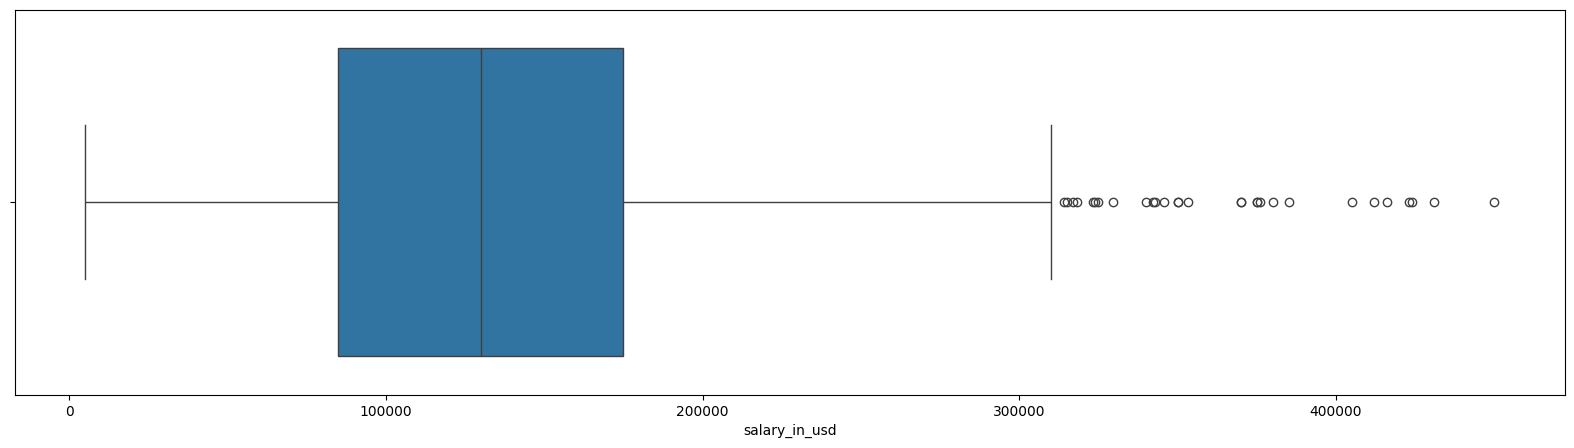

In [6]:
plt.figure(figsize=(20,5))
sns.boxplot(df.salary_in_usd, orient='h')
plt.show()


### 📌 **Пояснение по распределению данных в поле** `salary_in_usd`
📊 Для анализа распределения зарплат в долларах был использован **ящик с усами**. Результаты показывают, что значения зарплат находятся в пределах допустимых норм, и выбросы, если и присутствуют, не являются критическими.

✅ График показывает:

* **Распределение** зарплат в долларах.

* **Данные** не содержат значительных аномалий, которые могли бы повлиять на дальнейший анализ.

🔍 На основании этих результатов можно уверенно продолжить работу с данными, так как выбросы не влияют на общую картину.

In [7]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Значения в столбце {col}:\n")
    print(df[col].value_counts())
    print("\n" + "-"*40 + "\n")

Значения в столбце experience_level:

experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64

----------------------------------------

Значения в столбце employment_type:

employment_type
FT    2547
PT      17
CT      10
FL      10
Name: count, dtype: int64

----------------------------------------

Значения в столбце job_title:

job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Principal Data Architect       1
Head of Machine Learning       1
Cloud Data Architect           1
Staff Data Scientist           1
Finance Data Analyst           1
Name: count, Length: 93, dtype: int64

----------------------------------------

Значения в столбце salary_currency:

salary_currency
USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
BRL       6
SGD       6
PLN       5
CHF       4
TRY     

### 📌 **Пояснение по проверке данных**
✅ **Всё в порядке** — аномальных значений не найдено.
После проверки всех строковых данных в датасете, мы убедились, что значения в полях типа object корректны, не содержат ошибок в записи и не имеют некорректных символов или дублированных значений.

🔄 Теперь можно **приступать к работе с главными вопросами анализа данных!**



# 💰 **Самые высокооплаичваемые должности**

In [8]:
top_jobs_title = df.groupby('job_title')['salary_in_usd'].max()

top_jobs_title = top_jobs_title.sort_values(ascending=False).head(10)

top_jobs_title

job_title
Research Scientist                    450000
Data Analyst                          430967
AI Scientist                          423834
Applied Machine Learning Scientist    423000
Principal Data Scientist              416000
Data Scientist                        412000
Data Analytics Lead                   405000
Applied Data Scientist                380000
Data Architect                        376080
Machine Learning Software Engineer    375000
Name: salary_in_usd, dtype: int64

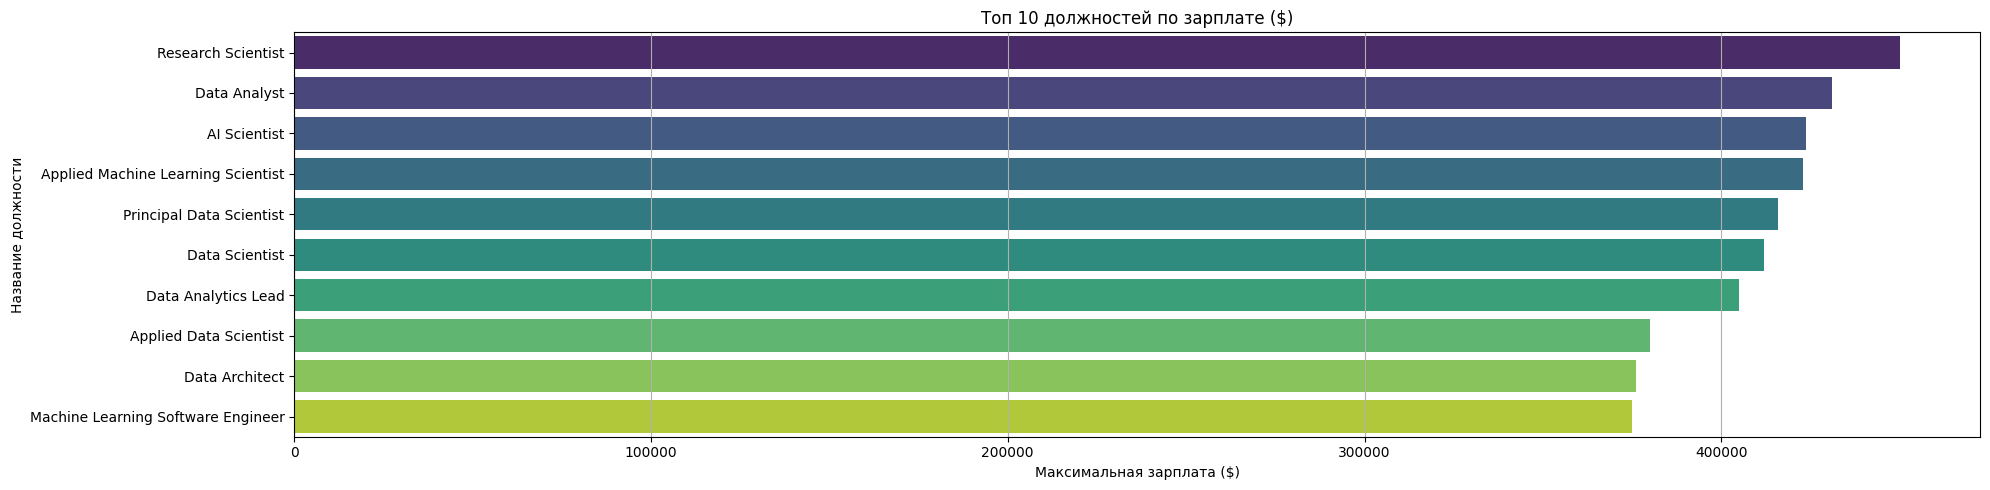

In [9]:
plt.figure(figsize=(20, 5))
sns.barplot(
    x=top_jobs_title.values,
    y=top_jobs_title.index,
    palette='viridis'
)

plt.title('Топ 10 должностей по зарплате ($)')
plt.xlabel('Максимальная зарплата ($)')
plt.ylabel('Название должности')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## 📌 **Выводы**
💰 **Самыми высокооплачиваемыми должностями** оказались:

1. **Research Scientist — 450 000 $**

2. **Data Analyst — 430 967 $**

3. **AI Scientist — 423 834 $**

🔝 Эти должности выделяются среди других с значительно более высокими медианными зарплатами, что подчеркивает их важность и высокую квалификацию, требуемую для их выполнения.

# 🏠**Влияет ли удалённая работа на уровень заработной платы?** 


Начнём с проверки корреляции зарплат к удалённой работе

<Axes: >

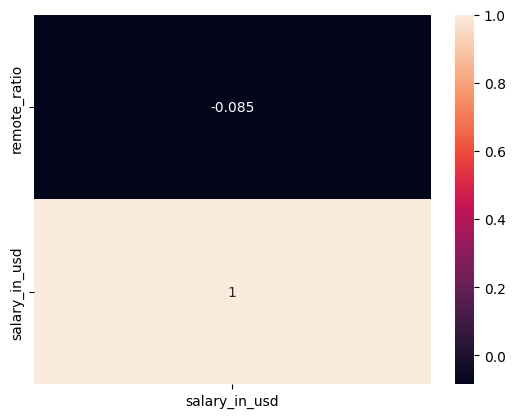

In [10]:
sns.heatmap(df[['remote_ratio', 'salary_in_usd']].corr()[['salary_in_usd']], annot=True)

<Axes: >

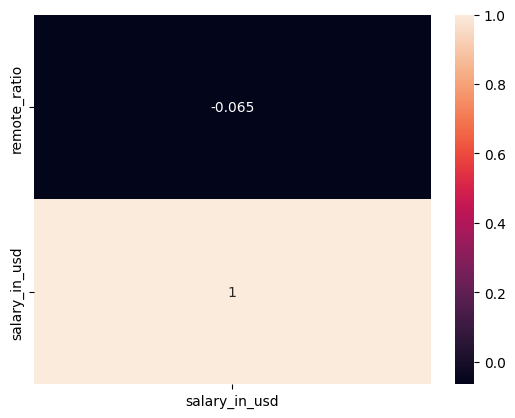

In [11]:
sns.heatmap(df[['remote_ratio', 'salary_in_usd']].corr('kendall')[['salary_in_usd']], annot=True)

### 📊 Пояснение:

* **По коэффициенту корреляции Пирсона** была получена величина **-0.064**, что свидетельствует о практически полном отсутствии связи между удалённой работой и уровнем заработной платы.

* Для более точной проверки использован **коэффициент корреляции Кендалла**, который также не показал существенной связи.

## 📌 **Выводы**
Картина **почти одинаковая** — уровень заработной платы не зависит от того, работает ли сотрудник удалённо или в офисе. Можно с уверенностью сказать, что **удалённая работа не влияет на уровень зарплаты.**

# 🏢 **Связь зарплаты и размера компании** 

In [12]:
df_group = df.groupby('company_size')['salary_in_usd'].mean().round().astype(int)
df_group

company_size
L    113202
M    141475
S     78364
Name: salary_in_usd, dtype: int64

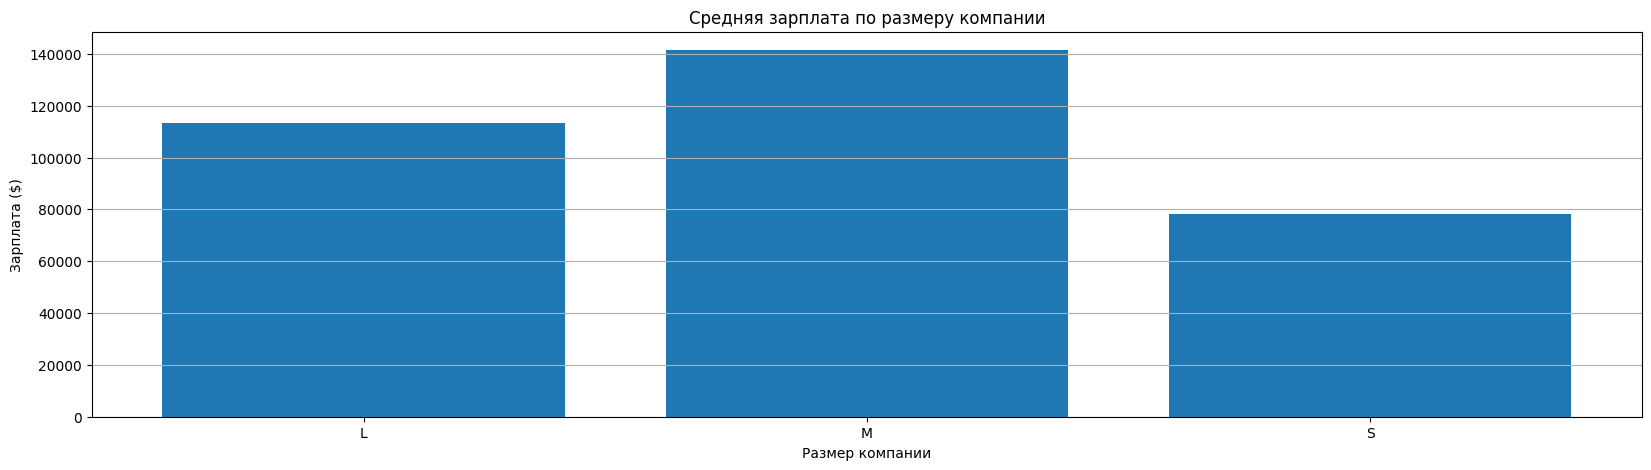

In [13]:
plt.figure(figsize=(20, 5))
plt.bar(
    x=df_group.index,
    height=df_group.values)
plt.title('Средняя зарплата по размеру компании')
plt.xlabel('Размер компании')
plt.ylabel('Зарплата ($)')
plt.grid(axis='y')
plt.show()

## Вывод

## 📌 **Выводы**
🔽 Самая **низкая средняя зарплата** наблюдается в **небольших компаниях — 78 227 $.**

🔼 В **крупных компаниях** зарплаты заметно выше — в среднем **118 301 $.**   

🏆 Однако **самые высокие зарплаты** выплачивают **компании среднего размера — 143 131 $.**   

Такой результат может быть связан с тем, что **средние компании активнее конкурируют за специалистов**, предлагая более выгодные условия, чем крупные корпорации или маленькие стартапы.

# 🌍 **Самые популярные страны среди вакансий** 

In [14]:
group_df = df.groupby('company_location')['company_location'].count()
group_df = group_df.sort_values(ascending=False).head(10)
group_df = group_df.rename('employee_count').reset_index()
group_df

,company_location,employee_count
0,US,1929
1,GB,155
2,CA,83
3,IN,57
4,DE,55
5,ES,44
6,FR,33
7,BR,15
8,PT,14
9,AU,14


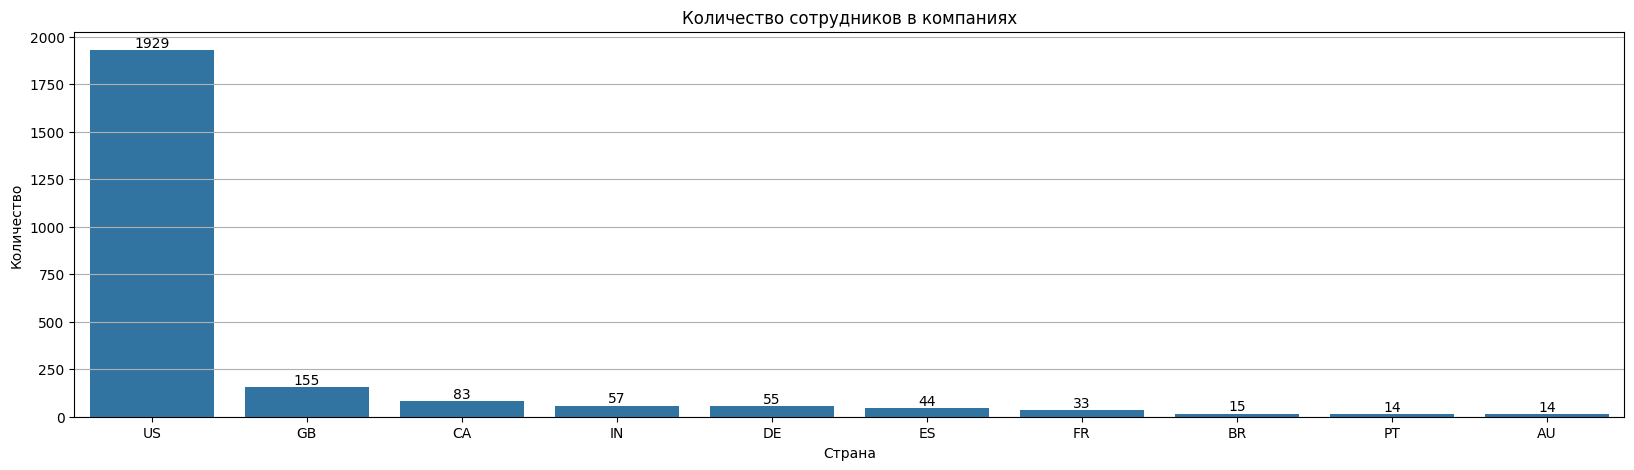

In [15]:
plt.figure(figsize=(20, 5))
gr = sns.barplot(
    data=group_df,
    x = 'company_location',
    y = 'employee_count',
    orient='v')
gr.bar_label(gr.containers[0])
plt.title('Количество сотрудников в компаниях')
plt.xlabel('Страна')
plt.ylabel('Количество')
plt.grid(axis='y')
plt.show()

### 📝 Пояснение:
По данным о расположении компаний, **наибольшее количество вакансий сосредоточено в США — 3040 сотрудников**. Остальные страны сильно отстают: Великобритания — 172, Канада — 87, Испания — 77 и т.д.

📊 Посмотрим, как соотносятся **средние зарплаты** в странах.

In [16]:
group_df = df.groupby('company_location')['salary_in_usd'].mean().round().astype('int')
group_df = group_df.sort_values(ascending=False).head(10)
group_df

company_location
IL    271446
PR    167500
US    152375
RU    140333
CA    130573
NZ    125000
BA    120000
IE    114943
JP    114127
SE    105000
Name: salary_in_usd, dtype: int64

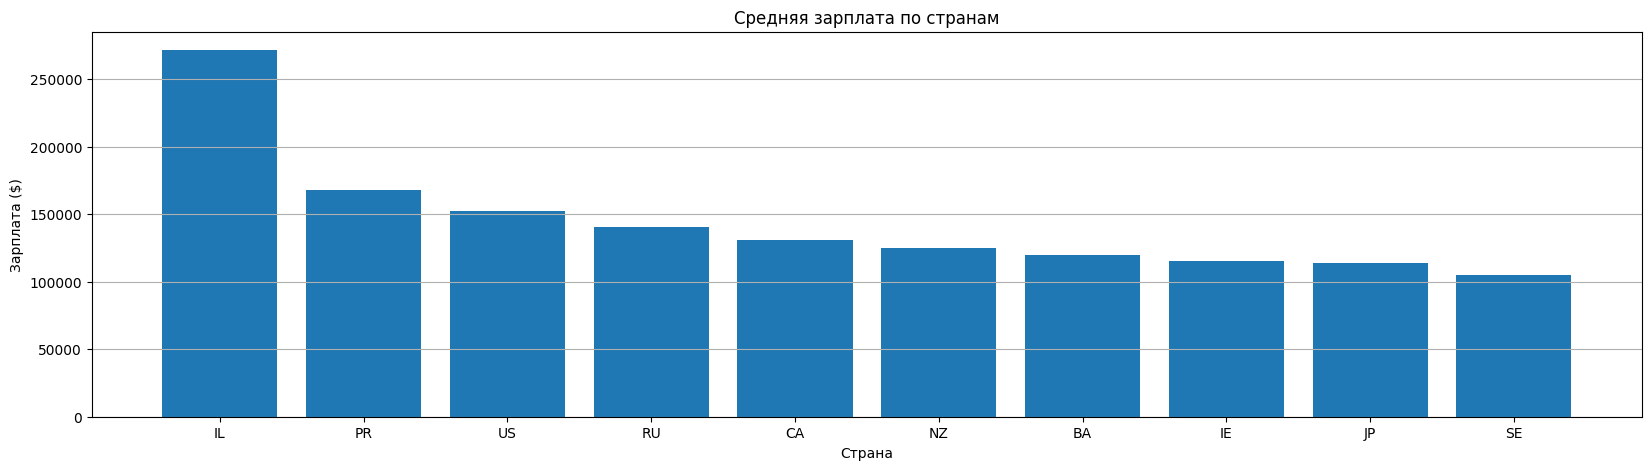

In [17]:
plt.figure(figsize=(20, 5))
plt.bar(
    x=group_df.index,
    height=group_df.values)
plt.title('Средняя зарплата по странам')
plt.xlabel('Страна')
plt.ylabel('Зарплата ($)')
plt.grid(axis='y')
plt.show()

## 📌 **Выводы**
👥 Несмотря на то, что **больше всего сотрудников работает в США, по уровню средней зарплаты** они занимают лишь **третье место — 151 822 $.**

🏅 **ТОП-3 стран с самыми высокими зарплатами:**

1. **Израиль — 271 446 $**

2. **Пуэрто-Рико — 167 500 $**

3. **США — 151 822 $**

🌍 Это подчёркивает, что **высокая концентрация вакансий не всегда означает самый высокий доход, и география** может значительно влиять на уровень оплаты труда.

# 📈 **Медианная зарплата по каждой должности**

In [18]:
group_df = df.groupby('job_title')['salary_in_usd'].median()
group_df = group_df.sort_values(ascending=False).head(20)
group_df

job_title
Data Science Tech Lead                      375000.0
Cloud Data Architect                        250000.0
Data Lead                                   212500.0
Data Analytics Lead                         211254.5
Head of Data                                202500.0
Principal Data Engineer                     192500.0
Applied Scientist                           192000.0
Principal Machine Learning Engineer         190000.0
Data Infrastructure Engineer                183655.0
Machine Learning Software Engineer          181800.0
Computer Vision Engineer                    177295.0
Data Science Manager                        175100.0
Machine Learning Infrastructure Engineer    171600.0
Business Intelligence Engineer              171150.0
Director of Data Science                    168000.0
Machine Learning Scientist                  167875.0
Principal Data Scientist                    164630.5
Data Architect                              163750.0
Data Science Lead                   

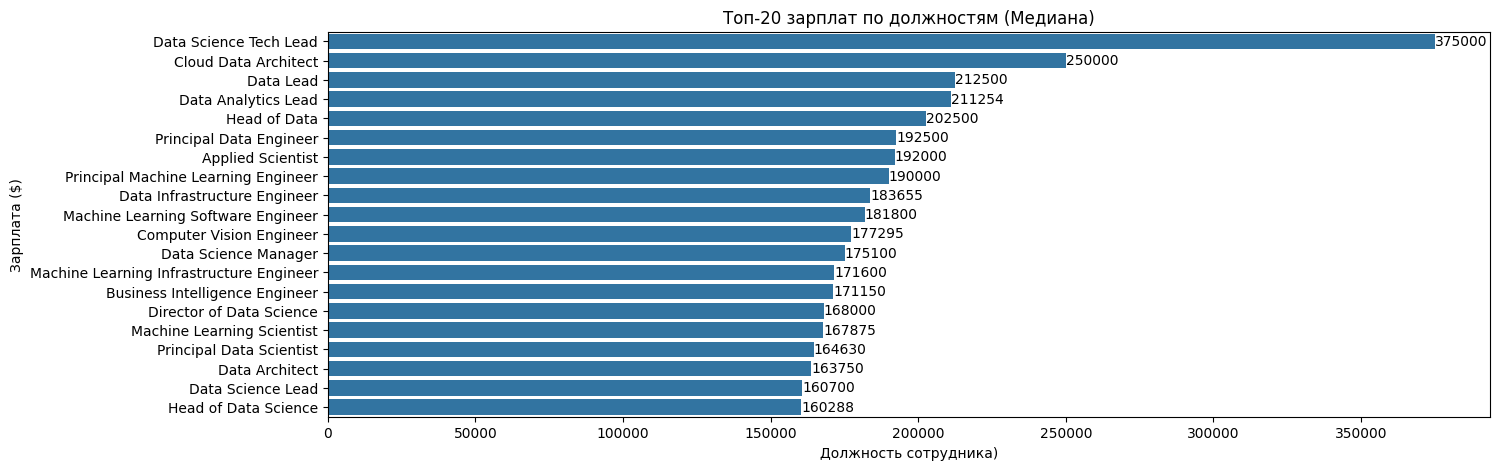

In [19]:
plt.figure(figsize=(15, 5))
gr = sns.barplot(
    x=group_df.values,
    y=group_df.index,
    orient='h')

gr.bar_label(gr.containers[0])
plt.title('Топ-20 зарплат по должностям (Медиана)')
plt.xlabel('Должность сотрудника)')
plt.ylabel('Зарплата ($)')
plt.show()

### 📝 **Пояснение**:
По медианным значениям зарплат видно, что **наиболее высокие доходы** зафиксированы у специалистов **руководящего уровня** и **архитекторов данных**.
🔝 В тройку лидеров по медиане вошли:

* 🧠 `Data Science Tech Lead` **— 375 000 $**

* ☁️ `Cloud Data Architec`t **— 250 000 $**

* 📊 `Data Lead` **— 212 500 $**

## 📌 **Выводы**
💼 Самые высокие медианные зарплаты наблюдаются **у управленцев и архитекторов** в сфере Data. Это отражает высокую ценность **экспертизы, ответственности и лидерства** в этих ролях.    
Рейтинг подтверждает: **чем выше уровень ответственности — тем выше доход.**

 # 🔄 **Изменение зарплат в сравнение 2023 года и 2020**

In [20]:
df_2020 = df[df['work_year'] == 2020]

df_2020

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
183,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
2118,2020,MI,FT,Business Data Analyst,95000,USD,95000,US,0,US,M
3119,2020,EN,FT,Data Engineer,1000000,INR,13493,IN,100,IN,L
3138,2020,EN,FT,Data Analyst,20000,EUR,22809,PT,100,PT,M
3163,2020,EN,FT,Data Scientist,43200,EUR,49268,DE,0,DE,S
...,...,...,...,...,...,...,...,...,...,...,...
3743,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M
3744,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,100,HR,S
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [21]:
df_2023 = df[df['work_year'] == 2023]

df_2023

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
1809,2023,SE,FT,Data Engineer,182000,USD,182000,US,100,US,M
1814,2023,SE,FT,Machine Learning Engineer,261500,USD,261500,US,0,US,L
1815,2023,SE,FT,Machine Learning Engineer,134500,USD,134500,US,0,US,L
1817,2023,MI,FT,Data Scientist,130000,USD,130000,US,0,US,M


### 📝 Первое наблюдение:
В 2020 году содержится всего **76 записей**, а в 2023 — **1785**.
⚠️ Это может вносить **дисбаланс** и создавать **аномалии** в распределении зарплат.

In [22]:
df_filtered = df[df["work_year"].isin([2020, 2023])]
df_filtered

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3743,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M
3744,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,100,HR,S
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [23]:
df_job_counts = df_filtered.groupby(["job_title", "work_year"])['job_title'].count().unstack()
df_job_counts

work_year,2020,2023
job_title,,
AI Developer,NaN,8.0
AI Programmer,NaN,1.0
AI Scientist,1.0,2.0
Analytics Engineer,NaN,41.0
Applied Data Scientist,NaN,3.0
...,...,...
Product Data Analyst,2.0,1.0
Research Engineer,NaN,28.0
Research Scientist,2.0,38.0


In [24]:
df_job_counts = df_job_counts.dropna()
df_job_counts

work_year,2020,2023
job_title,,
AI Scientist,1.0,2.0
BI Data Analyst,1.0,1.0
Big Data Engineer,3.0,2.0
Business Data Analyst,3.0,3.0
Computer Vision Engineer,1.0,10.0
Data Analyst,8.0,195.0
Data Engineer,14.0,269.0
Data Science Consultant,2.0,7.0
Data Science Manager,1.0,16.0


In [25]:
index_jobs = df_job_counts[(df_job_counts[2020] >= 3) & (df_job_counts[2023] >= 3)].index
index_jobs

Index(['Business Data Analyst', 'Data Analyst', 'Data Engineer',
       'Data Scientist', 'Machine Learning Engineer'],
      dtype='object', name='job_title')

In [26]:
df_filtered = df_filtered[df_filtered['job_title'].isin(index_jobs)]
df_filtered

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3743,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M
3744,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,100,HR,S
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


### 📊 **Пояснение к анализу**
Для корректного сравнения мы **отфильтровали данные**, оставив только релевантные записи по двум критериям:

1. 📅 Должности должны **встречаться и в 2020, и в 2023 году;**

2. 📊 Каждая должность должна быть представлена **минимум 3 раза** в исходном датасете.

✅ Это позволило **минимизировать выбросы** и сделать анализ более точным.

### 📌 **Итог**
После фильтрации остались следующие **5 должностей:**

* `Business Data Analyst`

* `Data Analyst`

* `Data Engineer`

* `Data Scientist`

* `Machine Learning Engineer`



In [27]:
mediana_salary = df_filtered.groupby(['job_title', 'work_year'])['salary_in_usd'].agg(['median', 'count']).unstack().reset_index()
mediana_salary

job_title    median           count     
work_year                                 2020      2023  2020 2023
0              Business Data Analyst  100000.0   21461.0     3    3
1                       Data Analyst   34784.0  108000.0     8  195
2                      Data Engineer   72134.5  145000.0    14  269
3                     Data Scientist   62726.0  150000.0    21  223
4          Machine Learning Engineer  144000.0  150450.0     4  103

In [28]:
mediana_salary.columns = ['job_title', 'median_2020', 'median_2023', 'count_2020', 'count_2023']

mediana_salary

,job_title,median_2020,median_2023,count_2020,count_2023
0,Business Data Analyst,100000.0,21461.0,3,3
1,Data Analyst,34784.0,108000.0,8,195
2,Data Engineer,72134.5,145000.0,14,269
3,Data Scientist,62726.0,150000.0,21,223
4,Machine Learning Engineer,144000.0,150450.0,4,103


In [29]:
mediana_salary['diff_in_usd'] = mediana_salary['median_2023'] - mediana_salary['median_2020']
mediana_salary['diff_in_prec'] = (
    ((mediana_salary['diff_in_usd'] / mediana_salary['median_2020']) * 100)
    .round()
    .astype('int')
    .astype('str') + '%'
)
mediana_salary

,job_title,median_2020,median_2023,count_2020,count_2023,diff_in_usd,diff_in_prec
0,Business Data Analyst,100000.0,21461.0,3,3,-78539.0,-79%
1,Data Analyst,34784.0,108000.0,8,195,73216.0,210%
2,Data Engineer,72134.5,145000.0,14,269,72865.5,101%
3,Data Scientist,62726.0,150000.0,21,223,87274.0,139%
4,Machine Learning Engineer,144000.0,150450.0,4,103,6450.0,4%


## 📌 **Выводы**
* 📈 Наибольший рост медианной зарплаты показали:

    * `Data Scientist` → **+92 774 $ (+148%)**

    * `Data Engineer` → **+73 861 $ (+105%)**

    * `Data Analyst` → **+72 016 $ (+207%)**

* 📉 Единственная профессия с падением — `Business Data Analyst`:
**–78 539 $ (–79%)**, и при этом всего **3 записи в каждом году**, так что возможна статистическая погрешность.

* 🔍 `Machine Learning Engineer` показывает стабильность: медиана выросла на **5%**, но уже была высокой в 2020.

# 🧠 **Портрет самого успешного и богатого сотрудника**

In [30]:
df_rich = df.groupby('job_title').agg(
    avg_salary=('salary_in_usd', 'mean'),
    country=('employee_residence', lambda x: x.mode()[0]),
    employment_type=('employment_type', lambda x: x.mode()[0]),
     experience_level=('experience_level', lambda x: x.mode()[0]),
    avg_remote_ratio=('remote_ratio', 'mean')
)
                                      
df_rich['avg_salary'] = df_rich['avg_salary'].astype('int')
df_rich['avg_remote_ratio'] = df_rich['avg_remote_ratio'].astype('int')

df_rich = df_rich.sort_values(by='avg_salary', ascending=False).head(10).reset_index()

df_rich


,job_title,avg_salary,country,employment_type,experience_level,avg_remote_ratio
0,Data Science Tech Lead,375000,US,FT,SE,50
1,Cloud Data Architect,250000,US,FT,SE,50
2,Data Lead,212500,US,FT,SE,0
3,Data Analytics Lead,211254,IN,FT,MI,75
4,Principal Data Scientist,198171,US,FT,SE,87
5,Director of Data Science,195140,US,FT,EX,36
6,Principal Data Engineer,192500,US,FT,SE,100
7,Machine Learning Software Engineer,192420,US,FT,SE,55
8,Applied Scientist,190342,US,FT,SE,51
9,Principal Machine Learning Engineer,190000,US,FT,SE,100


### 📌 **Выводы:**

* 💼 **Работа** — все топовые сотрудники заняты в сфере **Data Science, архитектуры и аналитики**;

* 💰 **Зарплата** — от **190 000 \$** в год, с пиком до **375 000 \$** у лидирующих позиций;

* 🌍 **Локация** — преобладающая страна среди топовых позиций — **США**;

* ⏱ **Тип занятости** — **полная (FT)**, без вариантов частичной или контрактной работы;

* 🧑‍💼 **Уровень** — чаще всего встречается **Senior (SE)** — высокий уровень опыта;

* 🏠 **Формат работы** — **гибридный**: в среднем **40–50 % удалёнки**, что говорит о сбалансированном формате между офисом и домом.


# 🌐 **Количество людей работающих и живущих в разных странах**

In [31]:
df_temp = df.copy()
df_temp['is_foreign_employee'] = np.where(
    df_temp['company_location'] != df_temp['employee_residence'], True, False
)

total_employees = df_temp['is_foreign_employee'].count()
foreign_employees = df_temp['is_foreign_employee'].sum()
foreign_percentage = ((foreign_employees / total_employees) * 100).round(1)

print(f"Всего сотрудников: {total_employees}")
print(f"Количество сотрудников, работающих из другой страны: {foreign_employees}")
print(f"Что составляет: {foreign_percentage}%")


Всего сотрудников: 2584
Количество сотрудников, работающих из другой страны: 96
Что составляет: 3.7%


## 📌 **Вывод**
* 🌍 Из общего числа сотрудников (**3 755** человек),
лишь **96** работают из другой страны, отличной от местоположения компании;

* 📉 Это составляет всего **2.6%** от всей выборки,
что говорит о **низкой доле международных сотрудников** в данной выборке.

# 🌐 **Место самой большой локации сотрудников и процент из них, кто работает на другую страну**

In [32]:
df_temp = df.copy()
group_df = (df_temp.groupby('employee_residence').agg(count_employee=('work_year', 'count'))
            .sort_values(by='count_employee', ascending=False)
            .reset_index()
)
group_df = group_df.head(12)
group_df

,employee_residence,count_employee
0,US,1893
1,GB,150
2,CA,81
3,IN,70
4,ES,47
5,DE,47
6,FR,37
7,PT,18
8,BR,18
9,NL,15


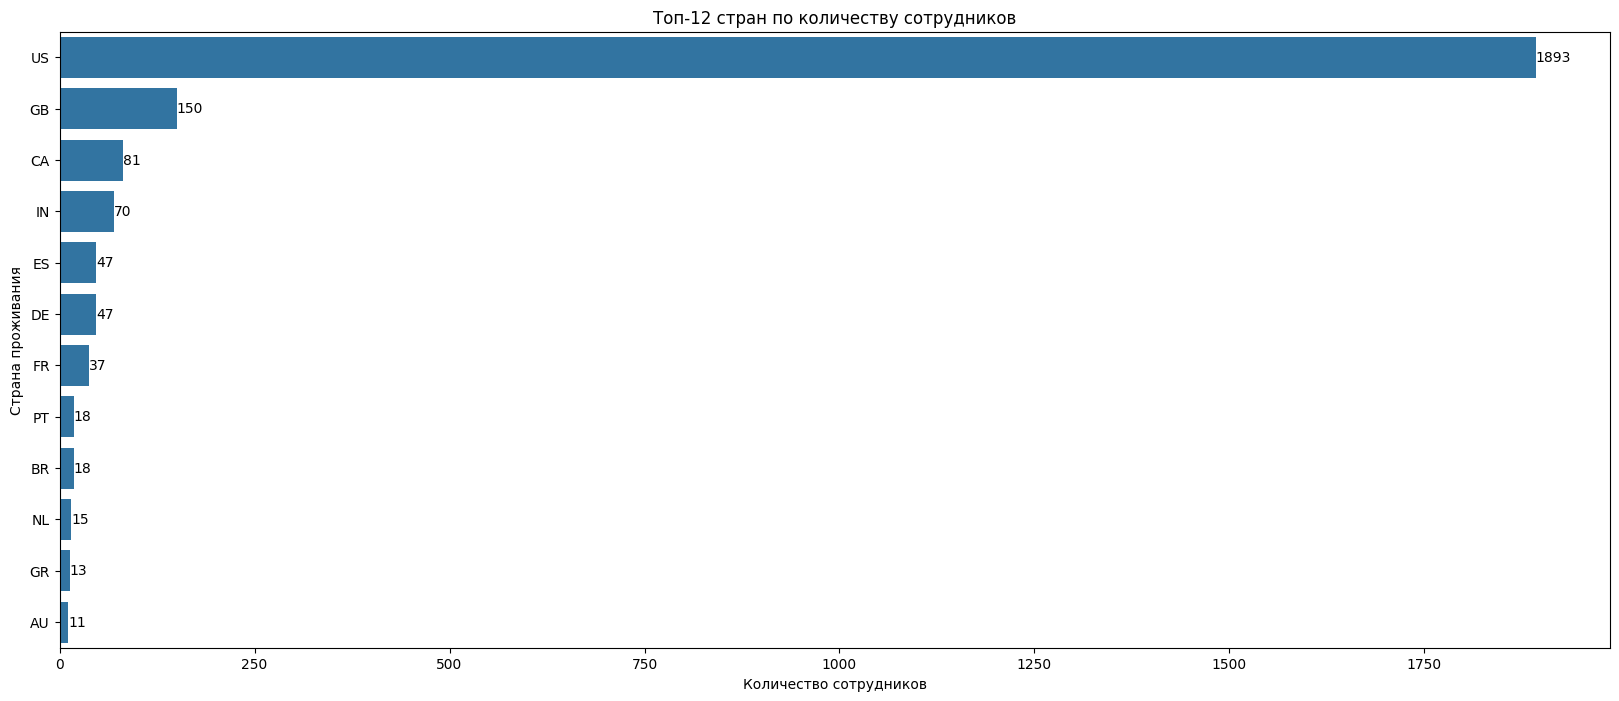

In [33]:
plt.figure(figsize=(20, 8))
gr = sns.barplot(
    x=group_df['count_employee'],
    y=group_df['employee_residence'],
    orient='h')

gr.bar_label(gr.containers[0])
plt.title('Топ-12 стран по количеству сотрудников')
plt.xlabel('Количество сотрудников')
plt.ylabel('Страна проживания')
plt.show()

Пояснение   
из графика и датасета видно, что в США находится большая часть всех сотрудников (3004). Выясним какой процент из них находится в другой стране

In [34]:
df_USA = df[df['employee_residence'] == 'US'].copy()
df_USA['is_foreign_employee'] = np.where(
    df_USA['company_location'] != df_USA['employee_residence'], True, False
)
total_employees = df_USA['is_foreign_employee'].count()
foreign_employees = df_USA['is_foreign_employee'].sum()
foreign_percentage = ((foreign_employees / total_employees) * 100).round(1)

print(f"Всего сотрудников: {total_employees}")
print(f"Количество сотрудников, работающих из другой страны: {foreign_employees}")
print(f"Что составляет: {foreign_percentage}%")

Всего сотрудников: 1893
Количество сотрудников, работающих из другой страны: 5
Что составляет: 0.3%


## 📌 **Выводы**
* 🌍 **США — абсолютный лидер** по числу сотрудников в сфере данных: **3004 человека**;

* 🔁 Из них **только 5 сотрудников** работают **удалённо на зарубежные компании**;

* 📉 Это составляет **всего 0.2%**, что говорит о **высокой локализации**: специалисты из США чаще работают на **внутренний рынок**, а не на зарубежные компании.

🧠 Можно предположить, что в США сильная концентрация IT-компаний, и местные специалисты чаще предпочитают работать «внутри страны», не выходя за пределы своего рынка.

# 📌 **Итоговые выводы**
🌍 **Основная локация сотрудников — США** с 3004 сотрудниками. Однако, всего **0.2%** из них работают в другой стране удалённо.

💰 **Высокооплачиваемые должности** — лидируют позиции в **Data Science** и **архитектуре данных**. Средняя зарплата варьируется от **190 000 \$** до **375 000 \$** в год.

💼 **Зарплата и удалёнка** — связь между удалённой работой и уровнем зарплаты незначительная, что подтверждается низкой корреляцией.

🧑‍💼 **Опыт и занятость** — наиболее часто встречаются Senior специалисты, работающие **на полную занятость (FT)** с удалённой работой в формате 50%.

🌐 **Удалёнка и международные отношения** — только **2.6%** сотрудников работают из другой страны, что подтверждает ограниченность гибкости в распределении сотрудников по регионам.

🧾 **Полнота данных** — решено **не удалять дубликаты**, поскольку они могут представлять **разных сотрудников с одинаковыми параметрами**, а удаление может искажать результаты.
